In [28]:
#Module 4: Model Development

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [31]:
from sklearn.linear_model import LinearRegression
#create linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [34]:
lm.intercept_

38423.305858157386

In [35]:
lm.coef_

array([-821.73337832])

In [36]:
#Question 1
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
lm1.intercept_

-7963.338906281049

In [39]:
lm1.coef_

array([166.86001569])

In [40]:
Yhat = lm1.predict(X)

In [41]:
#MLR
#develop a model using these variables 
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
#fit the linear model 
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lm.intercept_

-15806.624626329198

In [43]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [44]:
#Question2
Z = df[['normalized-losses', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
lm.intercept_

38201.31327245728

In [46]:
lm.coef_

array([   1.49789586, -820.45434016])

In [47]:
#Model Evaluation using visualization
# package: seaborn
import seaborn as sns
%matplotlib inline

(0, 48272.95666185728)

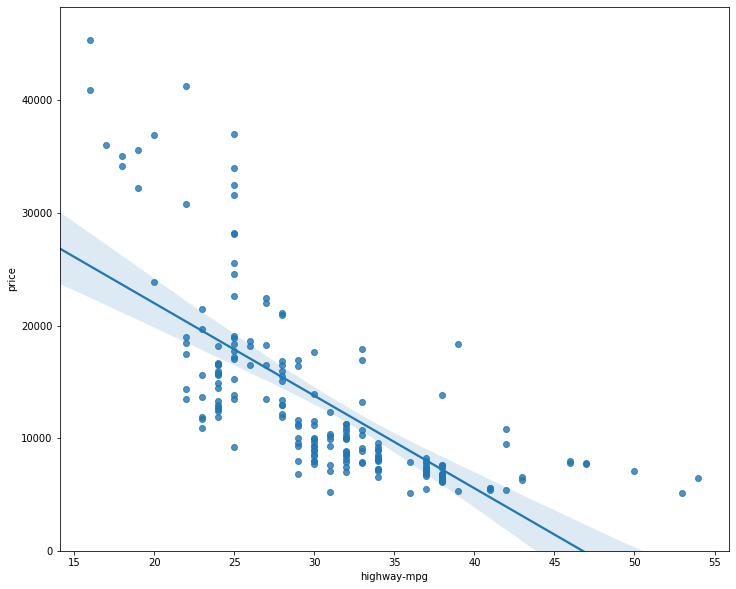

In [48]:
#Regression Plot, visualize highway-mpg as protential predictor of price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47422.919330307624)

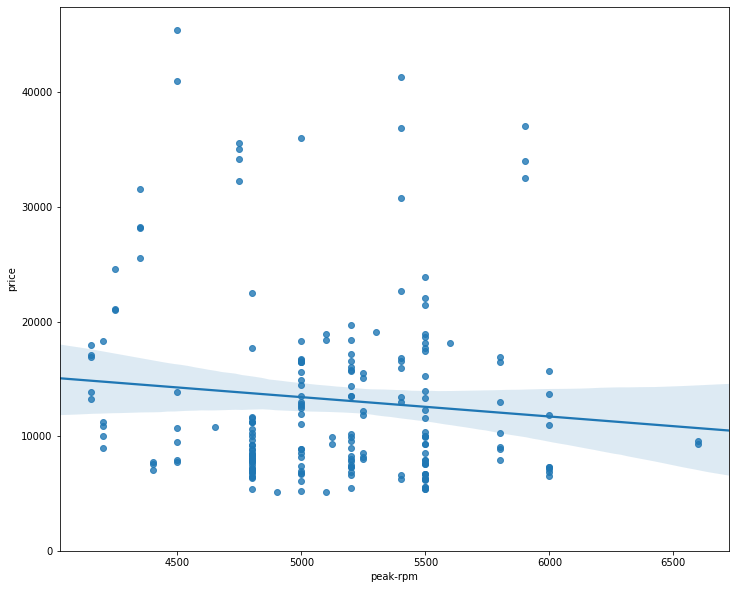

In [49]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [50]:
#Question 3
df[['highway-mpg', 'peak-rpm','price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


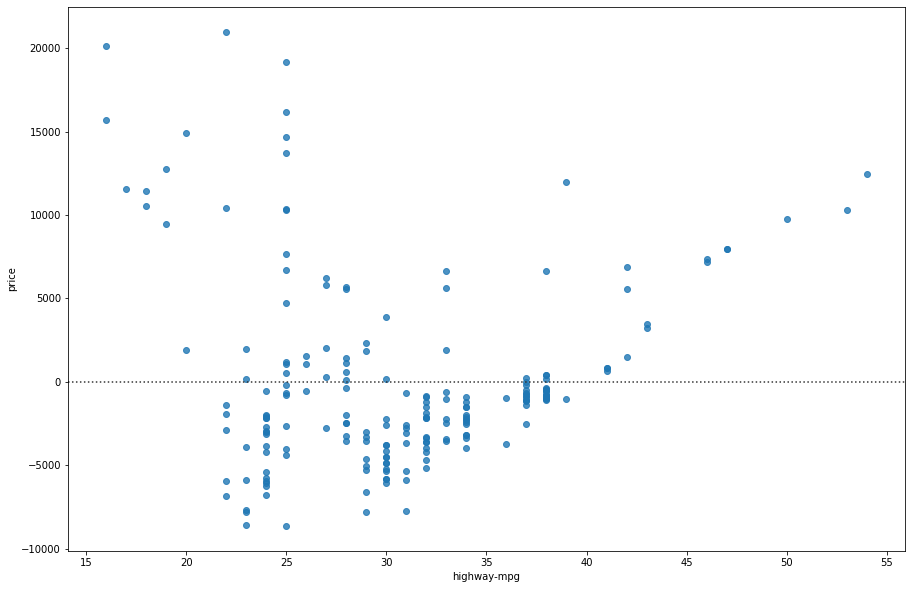

In [51]:
#Residual Plot
width = 15
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

In [52]:
#C: not randomly spread, non-linear more appropriate

In [53]:
Yhat = lm.predict(Z)

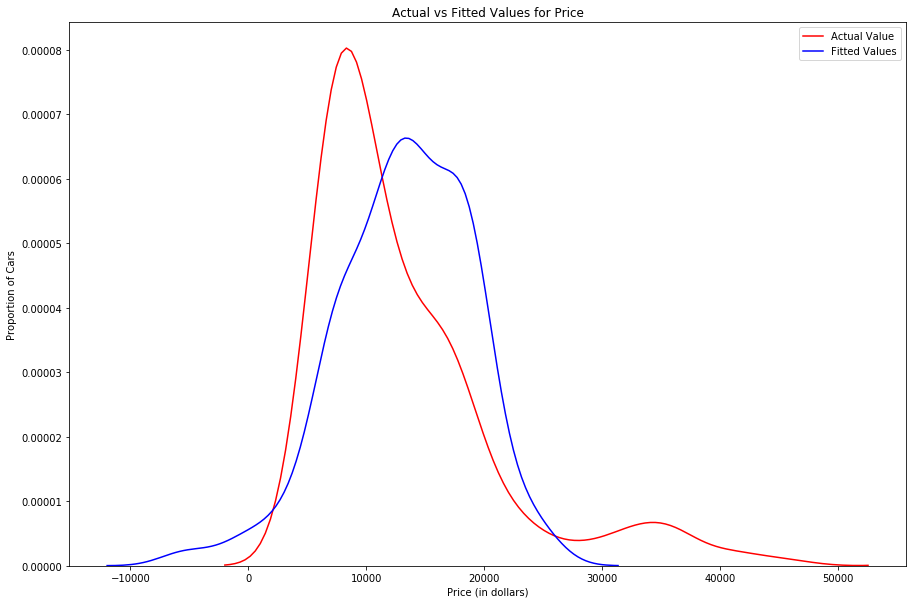

In [54]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [55]:
#The fitted value close to actual values,coz two distributions overlap a bit

In [56]:
#Part3 Polynomial regression and pipelines
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [57]:
x = df['highway-mpg']
y = df['price']
# use polynomial of 3rd order(cubic)
f = np.polyfit(x,y,3)
p = np.poly1d(f) #poly1d display polynominal function
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


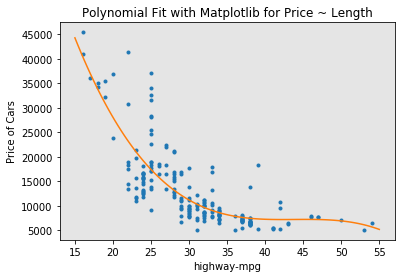

In [58]:
PlotPolly(p,x,y,'highway-mpg')

In [59]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


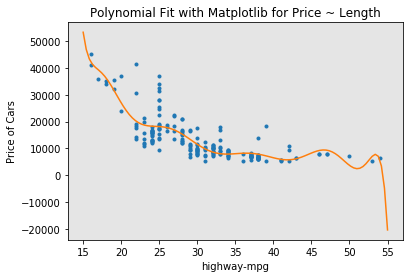

In [60]:
#Question 4
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x,y,11)
p = np.poly1d(f)
print(p)
PlotPolly(p,x,y,'highway-mpg')

In [61]:
#Perform polynomial transform on multiple features
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [62]:
Z_pr = pr.fit_transform(Z)

In [63]:
Z.shape

(201, 2)

In [64]:
Z_pr.shape

(201, 6)

In [65]:
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [66]:
#create pipeline by creating a list of tuples
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [67]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [68]:
#Normalize data, perform transform and fit the model 
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [69]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([15388.77780567, 15388.77780567, 16771.84474515, 11641.85647791])

In [70]:
#Question5
Input = [('scale', StandardScaler()),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
ypipe[0:10]

array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916,
       20396.97271047, 17872.69806371, 17926.6223148 , 17872.69806371,
       22028.89401561, 14695.7334135 ])

In [75]:
#Part4: Measures for In-sample Evaluation
#Model1: SLR, caculate R^2
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
print("The R square is: ", lm.score(X,Y))

The R square is:  0.4965911884339175


In [76]:
#caculate MSE: average of squares of errors, difference between actual value and estimated value
Yhat = lm.predict(X)
print("The output of the first four predicted value is: ", Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
#compare the predicted results with actual results
mse = mean_squared_error(df['price'], Yhat)
print("The mean square error of price and predicted value is: ", mse)

The mean square error of price and predicted value is:  31635042.944639895


In [81]:
#Model2: MLR
Z = df[['highway-mpg','horsepower']]
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.6634753624333398


In [82]:
Y_predict_multifit = lm.predict(Z)

In [84]:
print('The mean square error of price and predicted value using multifit is: ',mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  21147765.229280606


In [85]:
#Model3: Polynomial Fit
from sklearn.metrics import r2_score 
r_squared = r2_score(y,p(x))
print("The R-squared value is: ", r_squared)

The R-squared value is:  0.7023769093347487


In [86]:
mean_squared_error(df['price'], p(x))

18703127.633425873

In [87]:
#Part5: Prediction and Decision Making
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [90]:
#create a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [91]:
lm.fit(X,Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

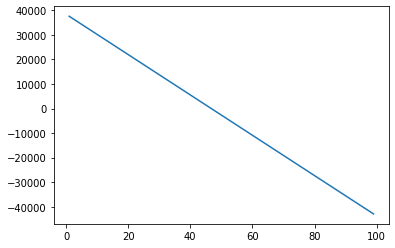

In [93]:
plt.plot(new_input, yhat)
plt.show()

In [ ]:
#The model with higher R-squared value, smallest MSE is better fit